**Building a meaning single dataframe using PANDAS**

In [23]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

In [102]:
# Get the SPY - ETF data from the web
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2010, 1, 30)
dfSPY = web.DataReader("SPY", "yahoo", start=start, end=end)['Adj Close']

In [110]:
dates = pd.date_range(start, end) # We get all the date range between the specify start and end date
df1 = pd.DataFrame(index=dates) # We created a dataframe with no columns but the index of the dates instead of 0-10...
# Let's combine the empty dataframe to SPY dataframe using join()
dfSPY = dfSPY.rename("SPY")
df1 = df1.join(dfSPY) # the default join is a left join here
# Let's drop the row that containd NaN Values
df1 = df1.dropna()
# Or we could just fill those NaN Values with 0 (ZEROS)
# df1 = df1.fillna(0)

In [108]:
dfSPY.rename?

**We need more than SPY data let's get for more stock and join their adj close into a single dataframe**

In [115]:
tickers = {"Google": "GOOGL", "IBM": "IBM", "Gold": "GLD"}
prices = []

print("Starting process...")
for company, tic in tickers.items():
    df = web.DataReader(tic, 'yahoo', start=start, end=end)['Adj Close']
    df = df.rename(company)
    df1 = df1.join(df)
    print(f"Got {company} dataset...")
print("Process successful exiting now!")

Starting process...
Got Google dataset...
Got IBM dataset...
Got Gold dataset...
Process successful exiting now!


In [117]:
print(df1)

                  SPY      Google        IBM        Gold
2010-01-04  91.841896  313.688690  93.500313  109.800003
2010-01-05  92.084984  312.307312  92.370834  109.699997
2010-01-06  92.149803  304.434448  91.770790  111.510002
2010-01-07  92.538841  297.347351  91.453102  110.820000
2010-01-08  92.846756  301.311310  92.370834  111.370003
2010-01-11  92.976433  300.855865  91.403702  112.849998
2010-01-12  92.109291  295.535522  92.130806  110.489998
2010-01-13  92.887291  293.838837  91.933167  111.540001
2010-01-14  93.138481  295.220215  93.401497  112.029999
2010-01-15  92.093094  290.290283  93.027351  110.860001
2010-01-19  93.243866  294.104095  94.693321  111.519997
2010-01-20  92.295685  290.495483  91.947273  108.940002
2010-01-21  90.520943  291.781769  91.064850  107.370003
2010-01-22  88.503036  275.280273  88.594124  107.169998
2010-01-25  88.956871  270.270264  89.031784  107.480003
2010-01-26  88.584091  271.481476  88.770592  107.559998
2010-01-27  89.005501  271.3213

### More about slicing

In [124]:
# Slice by row range (dates) using Dataframe.loc[] selector
print(df1.loc['2010-01-01':'2010-01-10'])

                  SPY      Google        IBM        Gold
2010-01-04  91.841896  313.688690  93.500313  109.800003
2010-01-05  92.084984  312.307312  92.370834  109.699997
2010-01-06  92.149803  304.434448  91.770790  111.510002
2010-01-07  92.538841  297.347351  91.453102  110.820000
2010-01-08  92.846756  301.311310  92.370834  111.370003


In [133]:
# Slice by column (symbol)
single_column = df1['Google']
multiple_column = df1[['SPY', 'IBM']]

In [135]:
#Slice by row and column (multiple dimension)
row_column = df1.loc['2010-01-01':'2010-01-10', ['Google', 'IBM']]
print(row_column)

                Google        IBM
2010-01-04  313.688690  93.500313
2010-01-05  312.307312  92.370834
2010-01-06  304.434448  91.770790
2010-01-07  297.347351  91.453102
2010-01-08  301.311310  92.370834


In [137]:
import matplotlib.pyplot as plt

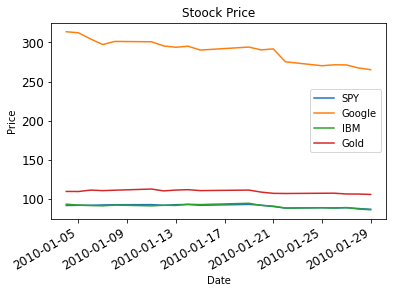

In [144]:
graph = df1.plot(title="Stoock Price", fontsize=12)
graph.set_xlabel("Date")
graph.set_ylabel("Price")
plt.show()